In [129]:
import brightway2 as bw
from ulcarchetype.utils import get_cf_info,minmax_archetype,cf_add_uncertainty
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
bw.projects.set_current('uncertain archetype I')

as example lets use a method with not many characterisation factors

In [42]:
method = ('ecological scarcity 2013', 'total', 'total')

In [64]:
bw.methods.random()

('ReCiPe Midpoint (H) V1.13',
 'human toxicity',
 'HTPinf',
 'archetype uncertainty')

## get_cf_info

In [43]:
cf_df = get_cf_info(method)
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,47262180-8308-5d4c-9332-c77617e032ef,"Antimony, in ground",790000.0,kilogram,natural resource,natural resource,in ground
1,biosphere3,240177d8-6f3b-43f5-8d1e-0c18114dfa02,"Barium, in ground",3200.0,kilogram,natural resource,natural resource,in ground
2,biosphere3,bf377e4f-3a95-4ce2-a9ba-66ee31f00f60,"Cadmium, in ground",1300000.0,kilogram,natural resource,natural resource,in ground
3,biosphere3,4057f8b4-f20a-59c9-9bb7-fdeaf5ad106d,"Cerium, in ground",180.0,kilogram,natural resource,natural resource,in ground
4,biosphere3,3d73ec21-de4d-5b68-b504-4ef59e15bd0e,"Europium, in ground",380000.0,kilogram,natural resource,natural resource,in ground
...,...,...,...,...,...,...,...,...
1597,biosphere3,454f5552-15ca-412d-821d-ab79cc0c989b,t-Butyl methyl ether,14000.0,kilogram,emission,air,lower stratosphere + upper troposphere
1598,biosphere3,edd62398-8916-4183-9615-65afce26518a,t-Butyl methyl ether,14000.0,kilogram,emission,air,non-urban air or from high stacks
1599,biosphere3,beb69352-568e-4a33-b9d4-3b5bfafc85bd,t-Butyl methyl ether,14000.0,kilogram,emission,air,None
1600,biosphere3,a793710a-1990-4e65-a95e-cfbbc5332355,t-Butyl methyl ether,14000.0,kilogram,emission,air,urban air close to ground


## minmax_archetype

In [44]:
minmax_archetype(cf_df)

,code,name,amount,minimum,maximum,compartment
114,"(biosphere3, 9d9246d4-0ce3-4b47-8491-cf62e562a...",Cesium-134,1.300000e+01,5.400000,1.300000e+01,water
116,"(biosphere3, 8bbe0b4c-5c9c-4959-a878-572f680e4...",Cesium-137,1.600000e+01,5.400000,1.600000e+01,water
152,"(biosphere3, 8d8e393e-39c4-44e1-b424-8eeefcd33...",Cobalt-60,4.200000e+00,4.200000,2.600000e+01,water
251,"(biosphere3, deb80fa5-4d0a-427e-9526-443f88d17...","Ethane, 1,2-dichloro-",4.600000e+05,120000.000000,4.600000e+05,water
265,"(biosphere3, 4b0d68e7-37bc-4184-93b5-91b70c62e...","Ethene, tetrachloro-",1.900000e+07,150000.000000,1.900000e+07,water
371,"(biosphere3, 9be02ae0-3170-4544-8665-f03a1b43f...","Hydrogen-3, Tritium",4.200000e-05,0.000042,4.700000e-03,water
517,"(biosphere3, 5189de76-6bbb-44ba-8c42-5714f1b43...",Nitrate,1.300000e+04,13000.000000,2.700000e+04,water
660,"(biosphere3, e8c62990-85c7-4f16-ab5f-76a5fc28a...","Radioactive species, Nuclides, unspecified",2.800000e+00,2.800000,3.300000e+02,water
770,"(biosphere3, 1869fd74-ed68-4814-9596-12315b1e8...",Uranium-234,2.300000e-01,0.230000,1.600000e+00,water
772,"(biosphere3, 4d466648-95dd-4866-97ad-6008746d3...",Uranium-235,2.200000e-01,0.220000,1.700000e+00,water


## cf_add_uncertainty

In [51]:
cfs = cf_add_uncertainty(method,uncertainty_type=4)

In [48]:
len(cfs)

1602

the result is a list of characterisation factors in the format needed to create a brightway2 method.

In [49]:
len(bw.Method(method).load())

1602

some of these are uncertain, they can be distinguished because their value is not a variable of type float but a dict

In [59]:
[(key,cfvalue) for key,cfvalue in cfs if isinstance(cfvalue,float)==False]

[(('biosphere3', '9d9246d4-0ce3-4b47-8491-cf62e562ad38'),
  {'amount': 13.0, 'maximum': 13.0, 'minimum': 5.4, 'uncertainty type': 4}),
 (('biosphere3', '8bbe0b4c-5c9c-4959-a878-572f680e428d'),
  {'amount': 16.0, 'maximum': 16.0, 'minimum': 5.4, 'uncertainty type': 4}),
 (('biosphere3', '8d8e393e-39c4-44e1-b424-8eeefcd33560'),
  {'amount': 4.2, 'maximum': 26.0, 'minimum': 4.2, 'uncertainty type': 4}),
 (('biosphere3', 'deb80fa5-4d0a-427e-9526-443f88d17b53'),
  {'amount': 460000.0,
   'maximum': 460000.0,
   'minimum': 120000.0,
   'uncertainty type': 4}),
 (('biosphere3', '4b0d68e7-37bc-4184-93b5-91b70c62e585'),
  {'amount': 19000000.0,
   'maximum': 19000000.0,
   'minimum': 150000.0,
   'uncertainty type': 4}),
 (('biosphere3', '9be02ae0-3170-4544-8665-f03a1b43f2bd'),
  {'amount': 4.2e-05,
   'maximum': 0.0047,
   'minimum': 4.2e-05,
   'uncertainty type': 4}),
 (('biosphere3', '5189de76-6bbb-44ba-8c42-5714f1b4371f'),
  {'amount': 13000.0,
   'maximum': 27000.0,
   'minimum': 13000.0,

# Example with ficticious method

## 1 unspecified flow

In [65]:
cfs=[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'),1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'),1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'),1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),10),#unspecified
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'),10)]

test_method_name_1=('test method','1 unspecified')

test_method_1=bw.Method(test_method_name_1)

metadata_test_method={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_1.register(**metadata_test_method)

In [66]:
if ('test method','1 unspecified') not in bw.methods:
    test_method_1.write(cfs)

create uncertain version.

In [67]:
# uncertain uniform
cfs_uniform_t1=cf_add_uncertainty(test_method_name_1,uncertainty_type=4)
new_method_name=('test method','1 unspecified','uncertain','uniform')
metadata=bw.Method(test_method_name_1).metadata
new_method=bw.Method(new_method_name)
new_method.register(**metadata)

In [68]:
if ('test method','1 unspecified','uncertain','uniform') not in bw.methods:
    new_method.write(cfs_uniform_t1)

In [69]:
# uncertain triangular
cfs_triangular_t1=cf_add_uncertainty(test_method_name_1,uncertainty_type=5)
new_method_name=('test method','1 unspecified','uncertain','triangular')
metadata=bw.Method(test_method_name_1).metadata
new_method=bw.Method(new_method_name)
new_method.register(**metadata)

In [70]:
if ('test method','1 unspecified','uncertain','triangular') not in bw.methods:
    new_method.write(cfs_uniform_t1)

In [71]:
assert bw.Method(('test method','1 unspecified','uncertain','uniform')).load() == cf_add_uncertainty(('test method','1 unspecified'))

In [72]:
cf_df= get_cf_info(('test method','1 unspecified','uncertain','uniform'))
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,051aaf7a-6c1a-4e86-999f-85d5f0830df6,"Particulates, < 2.5 um",1,kilogram,emission,air,"low population density, long-term"
1,biosphere3,ddd99a3a-be86-423d-b36a-a9dc8af1b1f8,"Particulates, < 2.5 um",1,kilogram,emission,air,lower stratosphere + upper troposphere
2,biosphere3,66f50b33-fd62-4fdd-a373-c5b0de7de00d,"Particulates, < 2.5 um",1,kilogram,emission,air,non-urban air or from high stacks
3,biosphere3,230d8a0a-517c-43fe-8357-1818dd12997a,"Particulates, < 2.5 um",10,kilogram,emission,air,urban air close to ground
4,biosphere3,21e46cb8-6233-4c99-bac3-c41d2ab99498,"Particulates, < 2.5 um","{'amount': 10, 'maximum': 10, 'minimum': 1, 'u...",kilogram,emission,air,None


some validations

In [73]:
# get_cf_info returns the same number of cf than the method
assert len(bw.Method(('test method','1 unspecified','uncertain','uniform')).load()) == len(get_cf_info(('test method','1 unspecified','uncertain','uniform')))

In [76]:
#data type
assert pd.api.types.is_numeric_dtype(get_cf_info(('test method','1 unspecified')).amount)

In [77]:
# there is just one uncertain flow
assert len(minmax_archetype(get_cf_info(('test method','1 unspecified'))))==1

In [78]:
# the maximum and minimum is rightly calculated
assert minmax_archetype(get_cf_info(('test method','1 unspecified'))).loc[0,'maximum']==\
get_cf_info(('test method','1 unspecified'))['amount'].max()

assert minmax_archetype(get_cf_info(('test method','1 unspecified'))).loc[0,'minimum']==\
get_cf_info(('test method','1 unspecified'))['amount'].min()

In [79]:
#test the fields 
cfs_uncertain=[cf for k,cf in cf_add_uncertainty(('test method','1 unspecified')) if isinstance(cf,dict)]

for cf in cfs_uncertain:
    assert 'amount' in cf
    assert 'minimum' in cf
    assert 'maximum' in cf
    assert 'uncertainty type' in cf

## 0 unnespecified flows

In [80]:
cfs=[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'),1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'),1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'),1),
 #(('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),10),#unspecified
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'),10)]

test_method_name_2=('test method','0 unspecified')

test_method_2=bw.Method(test_method_name_2)

metadata_test_method_2={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_2.register(**metadata_test_method_2)



In [81]:
if ('test method','0 unspecified') not in bw.methods:
    test_method_2.write(cfs)

In [82]:
get_cf_info(('test method','0 unspecified'))

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,051aaf7a-6c1a-4e86-999f-85d5f0830df6,"Particulates, < 2.5 um",1,kilogram,emission,air,"low population density, long-term"
1,biosphere3,ddd99a3a-be86-423d-b36a-a9dc8af1b1f8,"Particulates, < 2.5 um",1,kilogram,emission,air,lower stratosphere + upper troposphere
2,biosphere3,66f50b33-fd62-4fdd-a373-c5b0de7de00d,"Particulates, < 2.5 um",1,kilogram,emission,air,non-urban air or from high stacks
3,biosphere3,230d8a0a-517c-43fe-8357-1818dd12997a,"Particulates, < 2.5 um",10,kilogram,emission,air,urban air close to ground


In [83]:
minmax_archetype(get_cf_info(test_method_name_2))

In [84]:
cf_add_uncertainty(('test method','0 unspecified'))

In [85]:
assert cf_add_uncertainty(test_method_name_2) is None

## 1 flow only, and unspecified

In [86]:
cfs=[
 #(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'),1),
 #(('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'),1),
 #(('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'),1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),10),#unspecified
 #(('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'),10)
]

test_method_name_3=('test method','1 only unspecified')

test_method_3=bw.Method(test_method_name_3)

metadata_test_method_3={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_3.register(**metadata_test_method_3)

test_method_3.write(cfs)

In [87]:
cf_df = get_cf_info(('test method','1 only unspecified'))

In [88]:
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,21e46cb8-6233-4c99-bac3-c41d2ab99498,"Particulates, < 2.5 um",10,kilogram,emission,air,None


In [92]:
assert cf_add_uncertainty(('test method','1 only unspecified')) is None

## create product system example

create a very simple product system for validation purposes

activity 1

In [93]:
act1_key=('test_db','activity_1')

In [94]:
# a unique emission of PM in an uncertain archetype
biosphere_exchange_1={'amount':1,
                    'input':('biosphere3','21e46cb8-6233-4c99-bac3-c41d2ab99498'),
                    'output':act1_key,
                    'type':'biosphere',
                    'uncertainty type': 0}

In [95]:
production_exchange_1={'amount':1,
                     'input':act1_key,
                     'output':act1_key,
                     'type':'production',
                     'uncertainty type':0}

In [96]:
act_1_dict={'name':'test_activity_1',
 'unit':'megajoule',
 'exchanges':[production_exchange_1,biosphere_exchange_1]}

In [97]:
#act1_data={act1_key:act_1_dict}

activity 2

In [98]:
act2_key=('test_db','activity_2')

In [99]:
production_exchange_2={'amount':1,
                     'input':act2_key,
                     'output':act2_key,
                     'type':'production',
                     'uncertainty type':0}

In [100]:
technosphere_exchange_1={
    'amount':10, # or negative?
    'input':act1_key,
    'output':act2_key,
    'type':'technosphere',
    'uncertainty type':3,
    'loc':10,
    'scale':1,
}

In [101]:
act_2_dict={'name':'test_activity_2','unit':'megajoule','exchanges':[production_exchange_2,technosphere_exchange_1]}

In [102]:
#act2_data={act2_key:act_2_dict}

In [103]:
database_dict={act1_key:act_1_dict,
               act2_key:act_2_dict}

In [104]:
db=bw.Database('test_db')

In [105]:
db.write(database_dict)

Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 07/12/2020 23:15:44
  Finished: 07/12/2020 23:15:44
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.13


## simplest test

In [106]:
lca=bw.LCA({('test_db','activity_2'):1},('test method','1 unspecified'))

In [107]:
lca.lci()
lca.lcia()
lca.score

100.0

In [108]:
lca.technosphere_matrix.toarray()

array([[  1., -10.],
       [  0.,   1.]])

In [113]:
ainv=np.linalg.inv(lca.technosphere_matrix.toarray())

In [114]:
(lca.biosphere_matrix.toarray()).dot((ainv.dot(np.eye(2))).T)

array([[1., 0.]])

In [115]:
lca.demand_array

array([0., 1.])

In [116]:
lca.biosphere_matrix.toarray()

array([[1., 0.]])

In [117]:
lca.supply_array

array([10.,  1.])

In [118]:
lca.demand

{('test_db', 'activity_2'): 1}

In [120]:
lca.switch_method(method=('test method','1 unspecified','uncertain','uniform'))

In [121]:
lca.redo_lcia(demand={act2_key:1})

In [122]:
lca.score

100.0

uniform

In [123]:
mc_uncertain_u=bw.MonteCarloLCA({act2_key:1},('test method','1 unspecified','uncertain','uniform'))

In [124]:
%time results_uncertain_u = [next(mc_uncertain_u) for _ in range(0,10000)]

Wall time: 11.5 s


In [125]:
mc_uncertain_t=bw.MonteCarloLCA({act2_key:1},('test method','1 unspecified','uncertain','triangular'))

In [126]:
%time results_uncertain_t = [next(mc_uncertain_t) for _ in range(0,10000)]

Wall time: 11.7 s


In [127]:
mc_reference = bw.MonteCarloLCA({act2_key:1},('test method','1 unspecified'))

In [128]:
%time results_reference = [next(mc_reference) for _ in range(0,10000)]

Wall time: 11.7 s


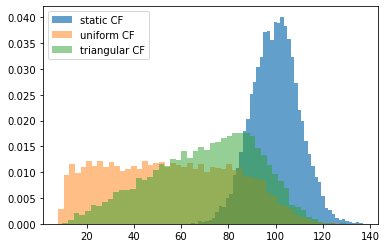

In [133]:
plt.hist(results_reference,density=True,alpha=0.7,label='static CF',bins=50);
plt.hist(results_uncertain_u,density=True,alpha=0.5,label='uniform CF',bins=50);
plt.hist(results_uncertain_t,density=True,alpha=0.5,label='triangular CF',bins=50);
plt.legend();